In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as  sc
import matplotlib.pyplot as plt
#For interactive plots
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Trying to correlate the number of beehives with the honey price and prodcution

In [30]:
#load the data
fertilizers = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
bees=fertilizers.loc[fertilizers.Item=='Beehives']

stocks = pd.read_csv('data/Prices_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
honey_price=stocks.loc[stocks.Item == 'Honey, natural']

production=pd.read_csv('data/Production_LivestockPrimary_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
honey_production=production.loc[(production.Item=='Honey, natural')  & (honey_production.Element=='Production')]

### Countries and Areas

In [32]:
countries = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia','Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium','Belgium-Luxembourg', 'Belize', 'Bolivia (Plurinational State of)','Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi','Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile','China', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba','Cyprus', 'Czechia', 'Czechoslovakia', 'Dominican Republic','Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia','Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia','Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam','Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti','Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)','Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya','Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein','Lithuania', 'Luxembourg', 'Madagascar', 'Mali', 'Martinique','Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique','Myanmar', 'Netherlands', 'New Caledonia', 'New Zealand','Nigeria', 'Niue', 'Occupied Palestinian Territory', 'Oman','Pakistan', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico','Republic of Korea', 'Republic of Moldova', 'Romania','Russian Federation', 'Rwanda', 'Samoa', 'Senegal', 'Serbia','Serbia and Montenegro', 'Slovakia', 'Slovenia', 'South Africa','Spain', 'Sudan', 'Sudan (former)', 'Sweden', 'Switzerland','Syrian Arab Republic', 'Tajikistan','The former Yugoslav Republic of Macedonia', 'Timor-Leste','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu','Uganda', 'Ukraine', 'United Kingdom','United Republic of Tanzania', 'United States of America','Uruguay', 'USSR', 'Uzbekistan','Venezuela (Bolivarian Republic of)', 'Viet Nam','Wallis and Futuna Islands', 'Yemen', 'Yugoslav SFR', 'Zambia']
world = ['World']
continents = ['Africa','Americas', 'Asia',  'Europe', 'Oceania']
regions = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa', 'Northern America', 'South America', 'Central America', 'Caribbean','Central Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Melanesia', 'Micronesia', 'Polynesia', 'Australia & New Zealand']
consolidations = ['European Union', 'China, mainland', 'China, Taiwan Province of',]
index_based = ['Least Developed Countries', 'Land Locked Developing Countries','Small Island Developing States','Low Income Food Deficit Countries', 'Net Food Importing Developing Countries']

## Let's have a look a the data 

For each country, we plot the honey price and production on one figure and the numberof beehives in a second one

In [107]:
@interact
def HoneyPrice(country=countries):
    h_p = honey_price.loc[(honey_price.Area == country) & (honey_price.Unit =='USD')]
    b=bees.loc[bees.Area==country]
    prod=honey_production.loc[(honey_production.Area==country)]
    
    fig, ax1 = plt.subplots(2)
    
    fig.set_size_inches(18, 10)

    color = 'tab:red'
    ax1[0].set_title('Honey price and Production')
    ax1[0].set_xlabel('year')
    ax1[0].set_ylabel('USD price', color=color)
    ax1[0].plot(h_p.Year, h_p.Value, color=color)
    ax1[0].tick_params(axis='y', labelcolor=color)

    ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Production in ', color=color)  # we already handled the x-label with ax1
    ax2.plot(prod.Year, prod.Value, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    
    ax1[1].plot(b.Year,b.Value)
    ax1[1].set_title('Number of beehives')
    
    
    
    
    

interactive(children=(Dropdown(description='country', options=('Albania', 'Algeria', 'Angola', 'Argentina', 'A…

## We can see here that there is a lot of data missing, especilly for the prices. most of the time we only have chuncks of the data, not even from the same time period 

Let's try to corellate the honey price with the number of beehives in the same time period.

First we extract the 

In [100]:
#Extract only the countries data
bees_countries = bees[bees['Area'].isin(countries)]
price_countries = honey_price[honey_price.Area.isin(countries)]
prod_countries = honey_production[honey_production.Area.isin(countries)]


In [117]:
def price_beehives_corr(c):
    bee = bees_countries.loc[bees_countries.Area == c]
    prod = prod_countries.loc[(prod_countries.Area == c)]
    
    if len(prod)>0 and len(bee)>0:
        min_year = max(bee.Year.min(),prod.Year.min())
        max_year = min(bee.Year.max(),prod.Year.max())

        bee = bee.loc[(bee.Year >= min_year) & (bee.Year<=max_year)]
        prod = prod.loc[(prod.Year >= min_year) & (prod.Year<=max_year)]
        
        
        if len(prod) == len(bee) and len(bee)  > 9: #we check only if we have at least tenyears of data
            try:
                return sc.stats.pearsonr(bee.Value,prod.Value)[0]
            except:
                return np.nan
        else:
            return np.nan
    else:
        return np.nan
    

In [118]:
def production_beehives_corr(c):
    bee = bees_countries.loc[bees_countries.Area == c]
    price = price_countries.loc[(price_countries.Area == c) & (price_countries.Unit == 'USD')]
    
    if len(price)>0 and len(bee)>0:
        min_year = max(bee.Year.min(),price.Year.min())
        max_year = min(bee.Year.max(),price.Year.max())

        bee = bee.loc[(bee.Year >= min_year) & (bee.Year<=max_year)]
        price = price.loc[(price.Year >= min_year) & (price.Year<=max_year)]
        
        
        if len(price) == len(bee) and len(bee)  > 9: #we check only if we have at least tenyears of data
            try:
                return sc.stats.pearsonr(bee.Value,price.Value)[0]
            except:
                return np.nan
        else:
            return np.nan
    else:
        return np.nan
    

In [119]:
def price_production_corr(c):
    prod = prod_countries.loc[prod_countries.Area == c]
    price = price_countries.loc[(price_countries.Area == c) & (price_countries.Unit == 'USD')]
    
    if len(price)>0 and len(bee)>0:
        min_year = max(prod.Year.min(),price.Year.min())
        max_year = min(prod.Year.max(),price.Year.max())

        prod = prod.loc[(prod.Year >= min_year) & (prod.Year<=max_year)]
        price = price.loc[(price.Year >= min_year) & (price.Year<=max_year)]
        
        
        if len(price) == len(prod) and len(prod)  > 9: #we check only if we have at least tenyears of data
            try:
                return sc.stats.pearsonr(prod.Value,price.Value)[0]
            except:
                return np.nan
        else:
            return np.nan
    else:
        return np.nan

In [131]:
corrs = []
index=[]
for c in countries:
    corr = []
    corr.append(price_beehives_corr(c))
    corr.append(price_production_corr(c))
    corr.append(production_beehives_corr(c))
    
    corrs.append(corr)
    index.append(c)
    
corrs = pd.DataFrame(data=corrs, columns=['price-beehives','price-prod','prod-beehives'],index=index)       

In [132]:
corrs

,price-beehives,price-prod,prod-beehives
Albania,0.942499,NaN,NaN
Algeria,NaN,NaN,NaN
Angola,0.993842,NaN,NaN
Argentina,0.886085,NaN,NaN
Armenia,0.919345,0.816956,0.926064
...,...,...,...
Viet Nam,0.934601,0.618630,0.834061
Wallis and Futuna Islands,0.936978,NaN,NaN
Yemen,0.999599,NaN,NaN
Yugoslav SFR,0.276241,NaN,NaN


Text(0.5, 1.0, 'Distribution of the number of beehives and \n the honey production correlation\n accross countries ')

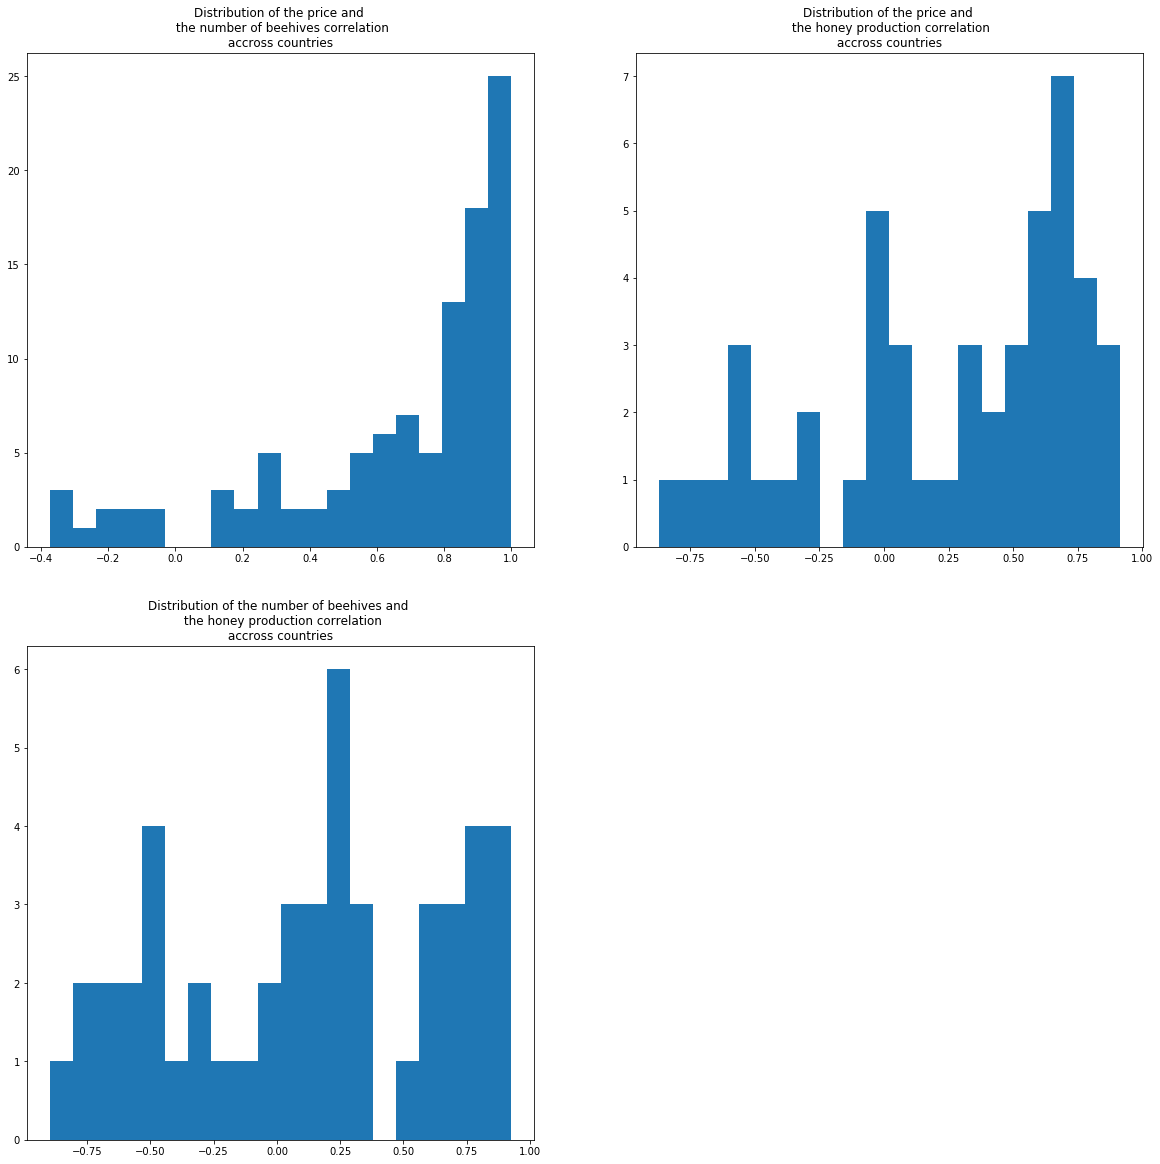

In [141]:
plt.figure(figsize=[20,20])
plt.subplot(221)
plt.hist(corrs['price-beehives'], bins=20)
plt.title('Distribution of the price and \n the number of beehives correlation\n accross countries ')

plt.subplot(222)
plt.hist(corrs['price-prod'], bins=20)
plt.title('Distribution of the price and \n the honey production correlation\n accross countries ')

plt.subplot(223)
plt.hist(corrs['prod-beehives'], bins=20)
plt.title('Distribution of the number of beehives and \n the honey production correlation\n accross countries ')

The distribution of the correlation of the honey price with the number of beehives seems to be left skewed, We can also distinguish the same pattern on the price/production plot. This could mean that, world wide, the number of beehives is dependent on the price of the honey. 

If we find a way to predict the price of honey in the next year, we could be able to deduce the number of beehives and the next years.

This needs further research because too much data is missing, it's hard to say if those result are justified